# Plotting system in REP

REP has simple internal represntation of plots prepared in report. 

In this notebook some details are given. This may help you to use REP efficiently, but **it is not needed to use REP** at all.

There are different plotting backends supported:
* __matplotlib__ (default, de-facto standard plotting library), 
* __ROOT__ (the library used by CERN employer),
* __bokeh__ (open-source package with interactive plots) 


Typically this works like:
```python
plot_object = report.roc()
plot_object.plot()
```

So, report functions return an object, which contains all the information to be plotted.
It's internal structire is always as simple as possible and can be inspected.

To draw the plot with different backends use the following functions:
* __matplotlib__ plot()
* __ROOT__ plot_tmva()
* __bokeh__ plot_bokeh()

Also __mpld3__ library allows you to turn matplotlib plots into interactive (see examples below).

In [1]:
# magic function to show matplotlib plots in the notebook
%matplotlib inline

In [2]:
import numpy
import matplotlib
import mpld3

# FunctionsPlot

Contains plots of lines (with labels, axes, etc.)

In [3]:
from rep.plotting import FunctionsPlot

In [4]:
n_points = 200
x_array = numpy.linspace(-5, 5, n_points)
first_func = (x_array, numpy.sin(6 * numpy.tanh(x_array)))
second_func = (x_array, numpy.sinc(x_array))
third_func = (numpy.sin(x_array) * numpy.linspace(0, 1, n_points), numpy.cos(x_array) * numpy.linspace(0, 1, n_points))


function_plot = FunctionsPlot({'first': first_func, 'second': second_func})

### matplotlib

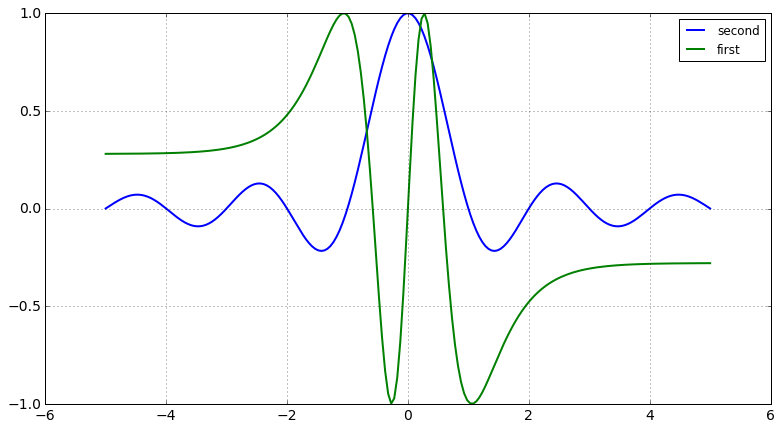

In [5]:
function_plot.plot(new_plot=True)

### matplotlib using mpld3 interactive plots

In [6]:
function_plot.plot(new_plot=True, xlim=(-5, 5), ylim=(0., 1.), title='example', xlabel='x', ylabel='y', fontsize=15)
mpld3.display()

### bokeh interactive plots

In [7]:
function_plot.plot_bokeh(figsize=(15, 10), xlabel='x', title='Example', ylim=(-0.5, 0.5))

Loading BokehJS ...

### TMVA style

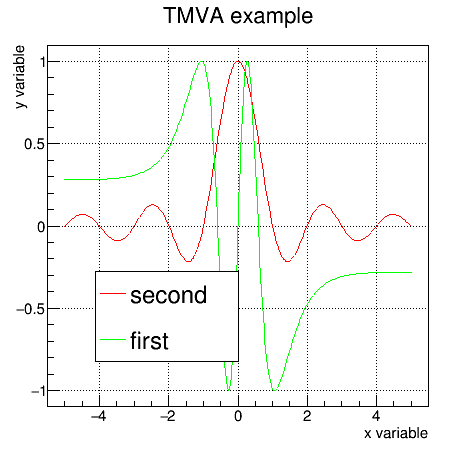

In [8]:
function_plot.plot_tmva(new_plot=True, figsize=(6, 6), title='TMVA example', 
                        xlabel='x variable', ylabel='y variable', )

## separate two lines

In [9]:
function_plot1 = FunctionsPlot({'first': first_func})
function_plot2 = FunctionsPlot({'second': second_func})
function_plot3 = FunctionsPlot({'third': third_func})

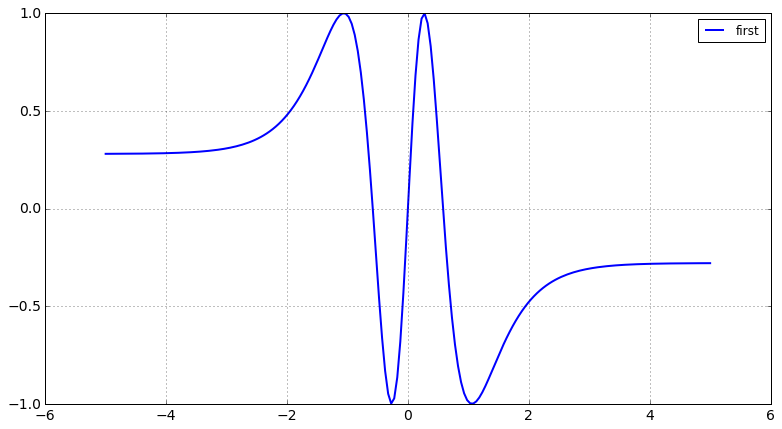

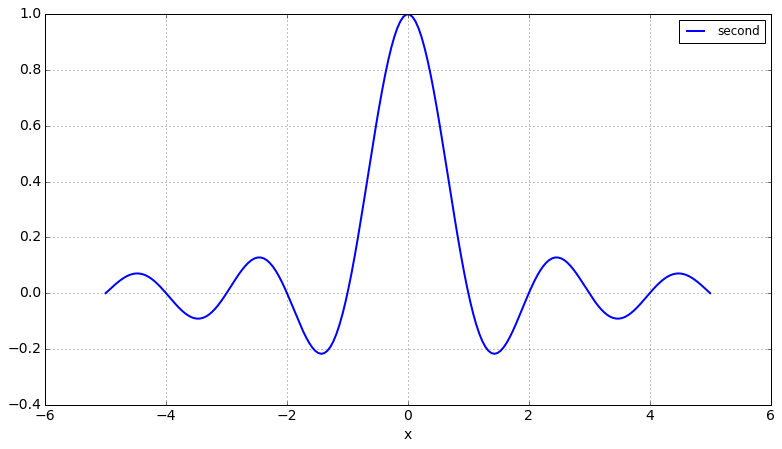

In [10]:
# put new_plot to separate figures for lines in matplotlib
function_plot1.plot(new_plot=True)
function_plot2.plot(new_plot=True, xlabel='x')

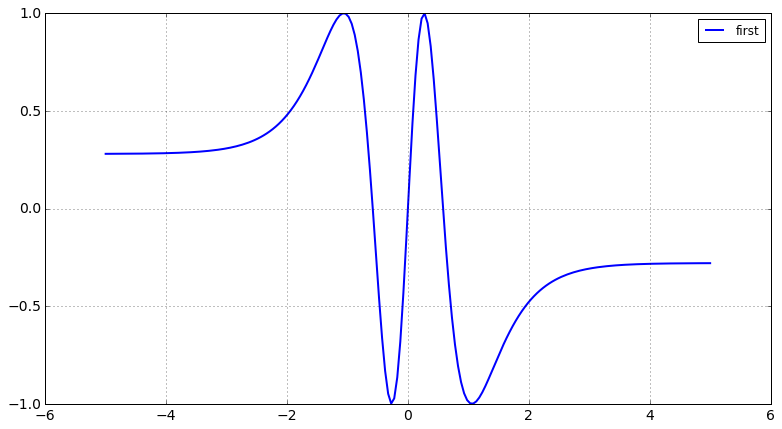

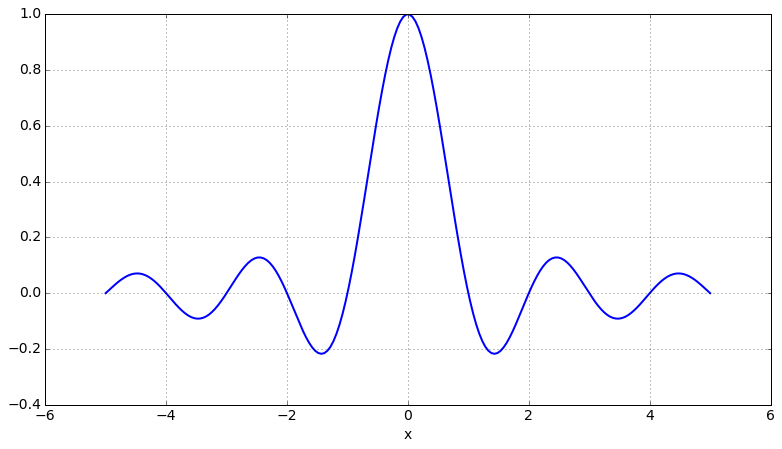

In [11]:
function_plot1.plot(new_plot=True)
function_plot2.plot(new_plot=True, xlabel='x', show_legend=False)

In [12]:
function_plot1.plot_bokeh()
function_plot2.plot_bokeh(title='bokeh', xlabel='x', ylabel='points', xlim=(-5, 0), fontsize=13,
                          show_legend=False)

# GridPlot

Organizes lots of plots in grid. Used when need to show many plots of same nature, this saves space :)

In [13]:
from rep.plotting import GridPlot, HStackPlot, VStackPlot
grid = GridPlot(2, function_plot1, function_plot2, function_plot3)

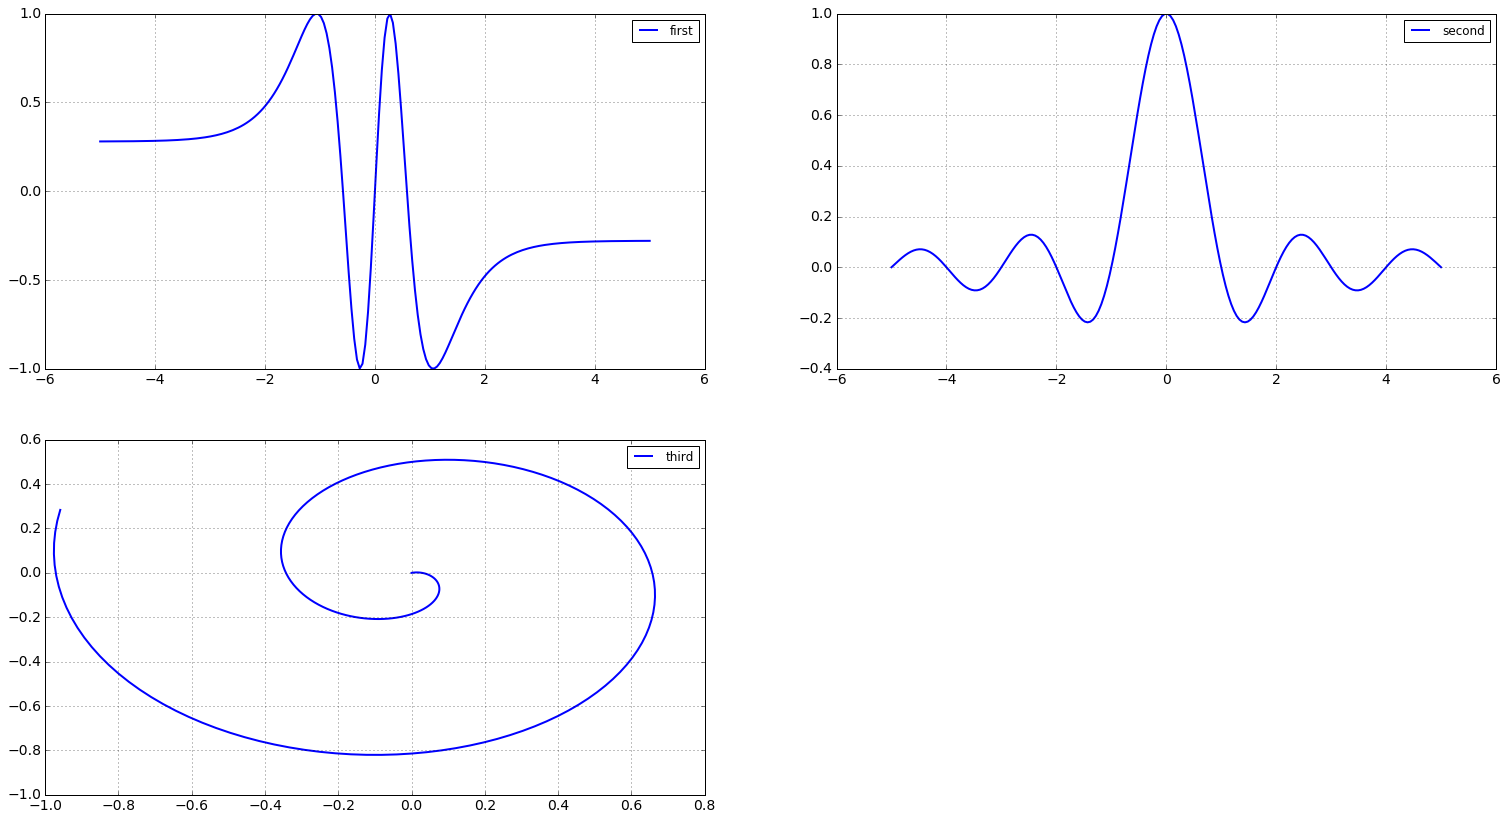

In [14]:
# parameters doesn't work here, set them for each plot in grid
grid.plot(title='grid', xlabel='x', ylim=(0.2, 0.8))

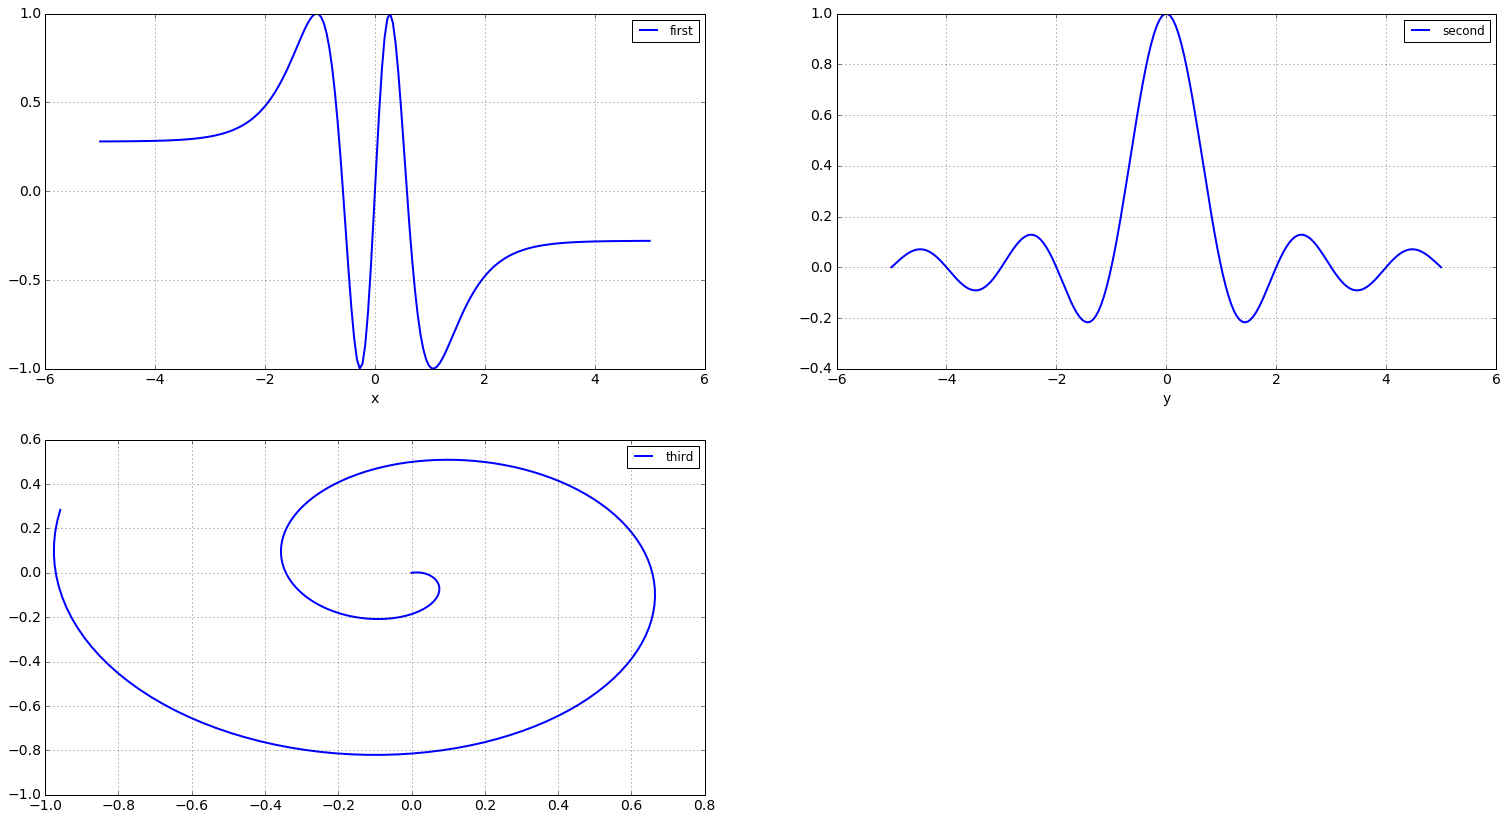

In [15]:
function_plot1.xlabel = 'x'
function_plot2.xlabel = 'y'
# these parameters will be ignored
function_plot1.figsize = (8, 6)
function_plot2.figsize = (4, 3)

grid = GridPlot(2, function_plot1, function_plot2, function_plot3)
# Only inner parameters of plot is used in grid, so grid ignores all parameters in plot(...)
# fot the exception of `show_legend` and `fontsize`.

grid.plot(xlabel='try', ylim=(0.2, 0.8))

In [16]:
# can be done with mpld3
# grid.plot(show_legend=False, fontsize=10, figsize=[12, 10])
# mpld3.display()

In [17]:
grid.plot_bokeh()

# HStackPLot, VStackPlot

Incorporates other plots and aligns them horizontally / vertically

In [18]:
hstack = HStackPlot(function_plot1, function_plot2, function_plot3)

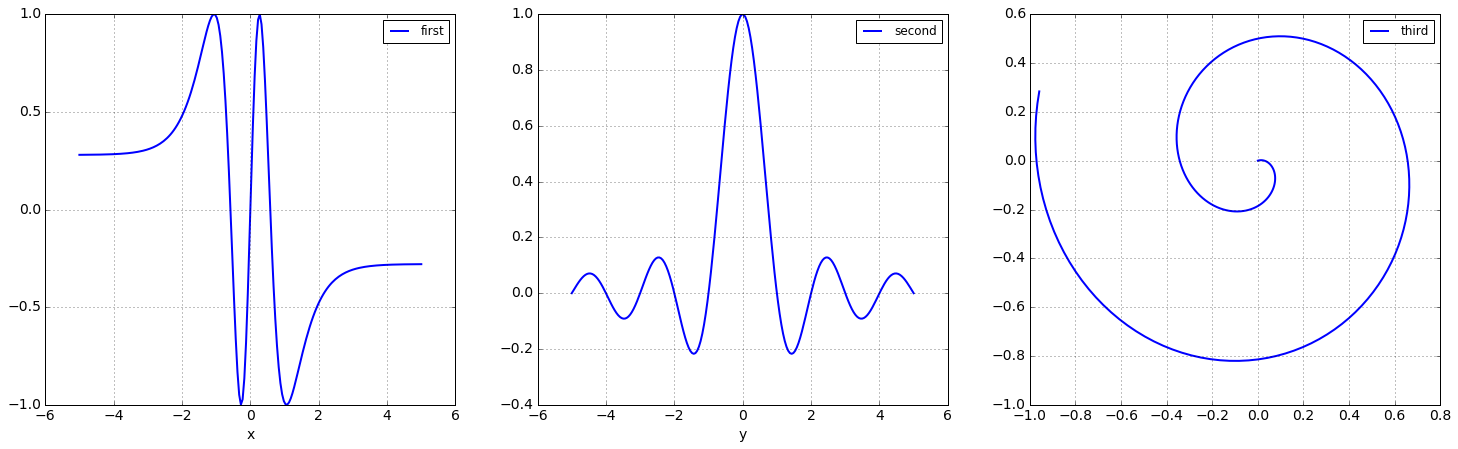

In [19]:
hstack.plot(title='stack', xlabel='x', ylim=(0.2, 0.8))

In [20]:
# hstack.plot(show_legend=False, fontsize=20)
# mpld3.display()

In [21]:
hstack.plot_bokeh()

In [22]:
vstack = VStackPlot(function_plot1, function_plot2, function_plot3)

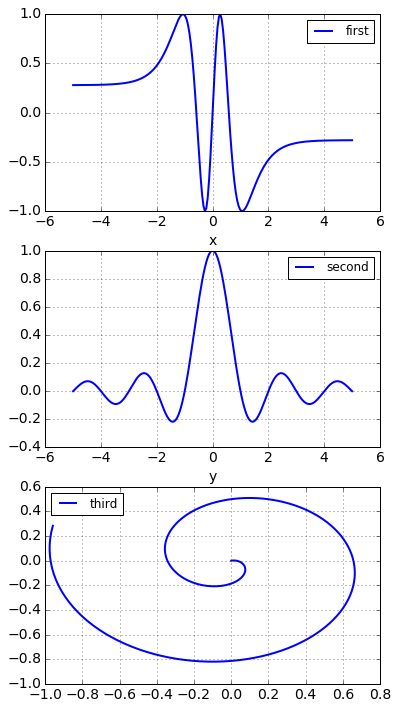

In [23]:
vstack.plot(new_plot=True, figsize=(6, 12), title='stack', xlabel='x', ylim=(0.2, 0.8))

In [24]:
vstack.plot(new_plot=True, figsize=(6, 12), show_legend=False, fontsize=10)
mpld3.display()

In [25]:
# vstack.plot_bokeh(figsize=(8, 13))

<h1>ColorMap</h1>

In [26]:
from rep.plotting import ColorMap
matrix = numpy.ndarray(shape=(3, 3), buffer=numpy.random.random(size=9))
cm = ColorMap(matrix, labels=['feature {}'.format(index) for index in range(3)])

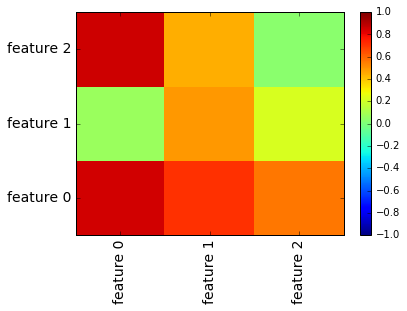

In [27]:
cm.plot(show_legend=False)

In [28]:
cm.plot(show_legend=False)
mpld3.display()

In [29]:
cm.plot_bokeh()

<h1>BarPlot</h1>

In [30]:
from rep.plotting import BarPlot
data = {'normal': (numpy.random.normal(0, 0.5, 100), numpy.ones(100), 'filled'),
        'gamma': (numpy.random.gamma(1.0, 2.0, 100), numpy.ones(100), '')}
bar = BarPlot(data)

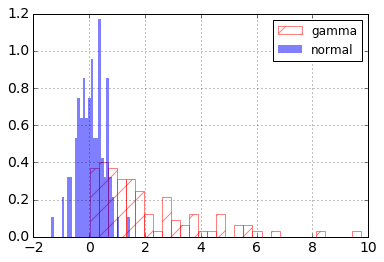

In [31]:
bar.plot()

In [32]:
bar.plot()
mpld3.display()

In [33]:
from rep.plotting import BarComparePlot
data = {'normal': {'one': 23, 'two': 34, 'three': 45},
        'gamma': {'one': 11, 'two': 23, 'three': 33}}
bar_c = BarComparePlot(data, sortby='normal')

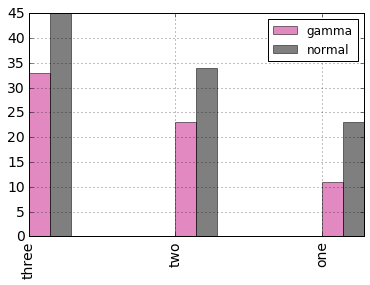

In [34]:
bar_c.plot()

In [35]:
bar_c.plot()
mpld3.display()

In [36]:
# bar_c.plot_bokeh()

# ErrorPlot

In [37]:
from rep.plotting import ErrorPlot
err = ErrorPlot({'uniform': (numpy.random.random(size=3), numpy.random.random(size=3), 
                             numpy.random.random(size=3), numpy.random.random(size=3))}, size=5)

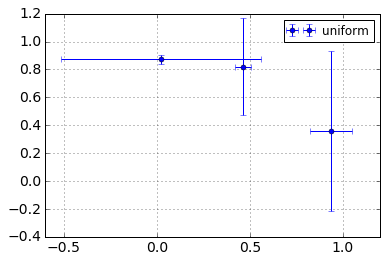

In [38]:
err.plot()

In [39]:
err.plot()
mpld3.display()

/Users/axelr/.conda/envs/rep/lib/python2.7/site-packages/mpld3/mplexporter/exporter.py:171: UserWarning: Legend element <matplotlib.collections.LineCollection object at 0x113066790> not impemented
  warnings.warn("Legend element %s not impemented" % child)
/Users/axelr/.conda/envs/rep/lib/python2.7/site-packages/mpld3/mplexporter/exporter.py:171: UserWarning: Legend element <matplotlib.collections.LineCollection object at 0x114580490> not impemented
  warnings.warn("Legend element %s not impemented" % child)


<h1>ScatterPlot</h1>

In [40]:
from rep.plotting import ScatterPlot
x_val = numpy.random.uniform(0.0, 1000.0, 100)
y_val = numpy.random.uniform(0.0, 1000.0, 100)
sp = ScatterPlot({'first': (x_val, y_val),
                  'second': (y_val, x_val)},
                 alpha=1, size=30)

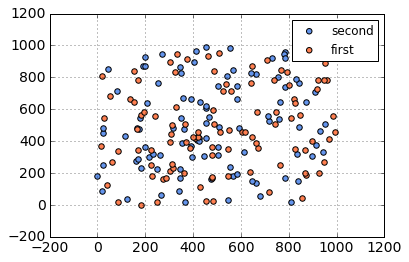

In [41]:
sp.plot()

In [42]:
sp.plot()
mpld3.display()

/Users/axelr/.conda/envs/rep/lib/python2.7/site-packages/mpld3/mplexporter/exporter.py:171: UserWarning: Legend element <matplotlib.collections.PathCollection object at 0x1130a6d50> not impemented
  warnings.warn("Legend element %s not impemented" % child)
/Users/axelr/.conda/envs/rep/lib/python2.7/site-packages/mpld3/mplexporter/exporter.py:171: UserWarning: Legend element <matplotlib.collections.PathCollection object at 0x1130a6e90> not impemented
  warnings.warn("Legend element %s not impemented" % child)


In [43]:
sp.plot_bokeh()

# Function2D_Plot

In [44]:
from rep.plotting import Function2D_Plot
def func(x, y):
    return numpy.sin(x + y*y)

func_plot = Function2D_Plot(func, xlim=(0, 5), ylim=(0, 5), xsteps=100, ysteps=100, vmin=0.5, vmax=1)

/Users/axelr/.conda/envs/rep/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


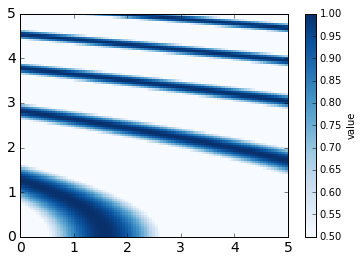

In [45]:
func_plot.plot()

# Histogram2d Plot

In [46]:
from rep.plotting import Histogram2D_Plot
hist2d_plot = Histogram2D_Plot([numpy.random.normal(size=1000), numpy.random.normal(size=1000)], bins=15, 
                               range=[[-1.5, 1.5], [-1, 2]])

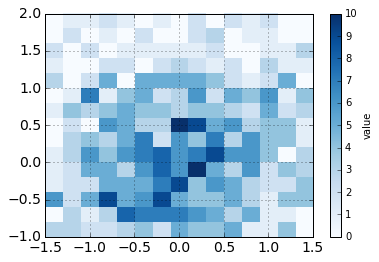

In [47]:
hist2d_plot

In [48]:
hist2d_plot.plot()
mpld3.display()

# Matplotlib interactive

One more plotting option is to use magic function for interactive matplotlib

* interactive figures shall be created with pyplot.figure, so use `new_plot=True` for correctness 
* after saving to file/refreshing interactive plot is replaced with image

In [49]:
# %matplotlib notebook

In [50]:
# hist2d_plot.plot(new_plot=True)